In [136]:
#Import important Python libraries to be used during the analysis of Aerofit dataset

import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare,chi2,chi2_contingency
from scipy.stats import f_oneway,levene,shapiro,kruskal
from scipy.stats import ttest_ind,ttest_rel
from statsmodels.graphics.gofplots import qqplot

In [3]:
#Read the dataset from local library

df=pd.read_csv("C:/Users/samaksharma/Downloads/Scaler_DS/09_Product Analytics/Project_Yulu/yulu_dataset.csv")

# 1. Define Problem Statement and perform Exploratory Data Analysis

# Problem Definition

Yulu, an Indian shared electric cycles company wants to understand which factors are important to predict the demand.
Company would like us to analyse the various factors impacting the electric bicycle demand like weather, holidays, time of day etc.

# Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [4]:
# Calculate the shape of dataset

a=df.ndim
b=df.shape
print(f'This is a {a} dimensional dataset.')
print(f'There are {b[0]} rows and {b[1]} columns in this dataset.')

This is a 2 dimensional dataset.
There are 10886 rows and 12 columns in this dataset.


In [5]:
# Glimpse of how the data looks like

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Extract datatypes for all fields

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
# Split datetime column into 2 different columns for date and time and rearrange the column date and time
# to come at the beginning

df['date']=df['datetime'].str.split(' ').apply(lambda x:x[0])
df['time']=df['datetime'].str.split(' ').apply(lambda x:x[1])
df.drop(columns={'datetime'},inplace=True)

new_order=['date','time','season','holiday','workingday','weather','temp','atemp','humidity','windspeed','casual','registered','count']
df=df[new_order]

In [8]:
# Convert 1,2,3 and 4 values in season field to spring, summer, fall and winter respectively

def season_conv(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
df['season']=df['season'].apply(season_conv)

In [9]:
# Convert 0 and 1 in holiday field to 'No Holiday' and 'Holiday' respectively

def holiday_conv(x):
    if x==0:
        return 'No Holiday'
    else:
        return 'Holiday'
df['holiday']=df['holiday'].apply(holiday_conv)

In [10]:
# Convert 0 and 1 in workingday field to 'No Workday' and 'Workday' respectively

def workday_conv(x):
    if x==0:
        return 'No Workday'
    else:
        return 'Workday'
df['workingday']=df['workingday'].apply(workday_conv)

In [11]:
# Statistical Summary

round(df.describe(),2)

,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00,10886.00
mean,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57
std,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14
min,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00
25%,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00
50%,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00
75%,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00
max,4.00,41.00,45.46,100.00,57.00,367.00,886.00,977.00


- Mean and median values are almost same for temp, atemp, humidity and windspeed
- At a particular time, we can see the range of total users varying from 1 to 977 which indicates that there is high demand during some part of the day

In [12]:
# Statistical Summary for String

df.describe(include=object)

,date,time,season,holiday,workingday
count,10886,10886,10886,10886,10886
unique,456,24,4,2,2
top,2011-01-01,12:00:00,winter,No Holiday,Workday
freq,24,456,2734,10575,7412


- We have data for 456 days and 24 hours

In [13]:
# Detect missing values

df.isna().sum()

date          0
time          0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

As we see in the output, there are no missing values in the dataset

# Univariate Analysis

In [14]:
# Analyse the rides taken in each month

df_temp=df.copy()
df_temp['mth-yr']=df['date'].str.split('-').apply(lambda x:x[0]+x[1])

def dateconv(x):
    if x[:4]=='2011':
        if x[4:]=='01':
            return 'Jan 2011'
        elif x[4:]=='02':
            return 'Feb 2011'
        elif x[4:]=='03':
            return 'Mar 2011'
        elif x[4:]=='04':
            return 'Apr 2011'
        elif x[4:]=='05':
            return 'May 2011'
        elif x[4:]=='06':
            return 'June 2011'
        elif x[4:]=='07':
            return 'July 2011'
        elif x[4:]=='08':
            return 'Aug 2011'
        elif x[4:]=='09':
            return 'Sep 2011'
        elif x[4:]=='10':
            return 'Oct 2011'
        elif x[4:]=='11':
            return 'Nov 2011'
        else:
            return 'Dec 2011'
    else:
        if x[4:]=='01':
            return 'Jan 2012'
        elif x[4:]=='02':
            return 'Feb 2012'
        elif x[4:]=='03':
            return 'Mar 2012'
        elif x[4:]=='04':
            return 'Apr 2012'
        elif x[4:]=='05':
            return 'May 2012'
        elif x[4:]=='06':
            return 'June 2012'
        elif x[4:]=='07':
            return 'July 2012'
        elif x[4:]=='08':
            return 'Aug 2012'
        elif x[4:]=='09':
            return 'Sep 2012'
        elif x[4:]=='10':
            return 'Oct 2012'
        elif x[4:]=='11':
            return 'Nov 2012'
        else:
            return 'Dec 2012'

df_temp['mth-yr']=df_temp['mth-yr'].apply(dateconv)

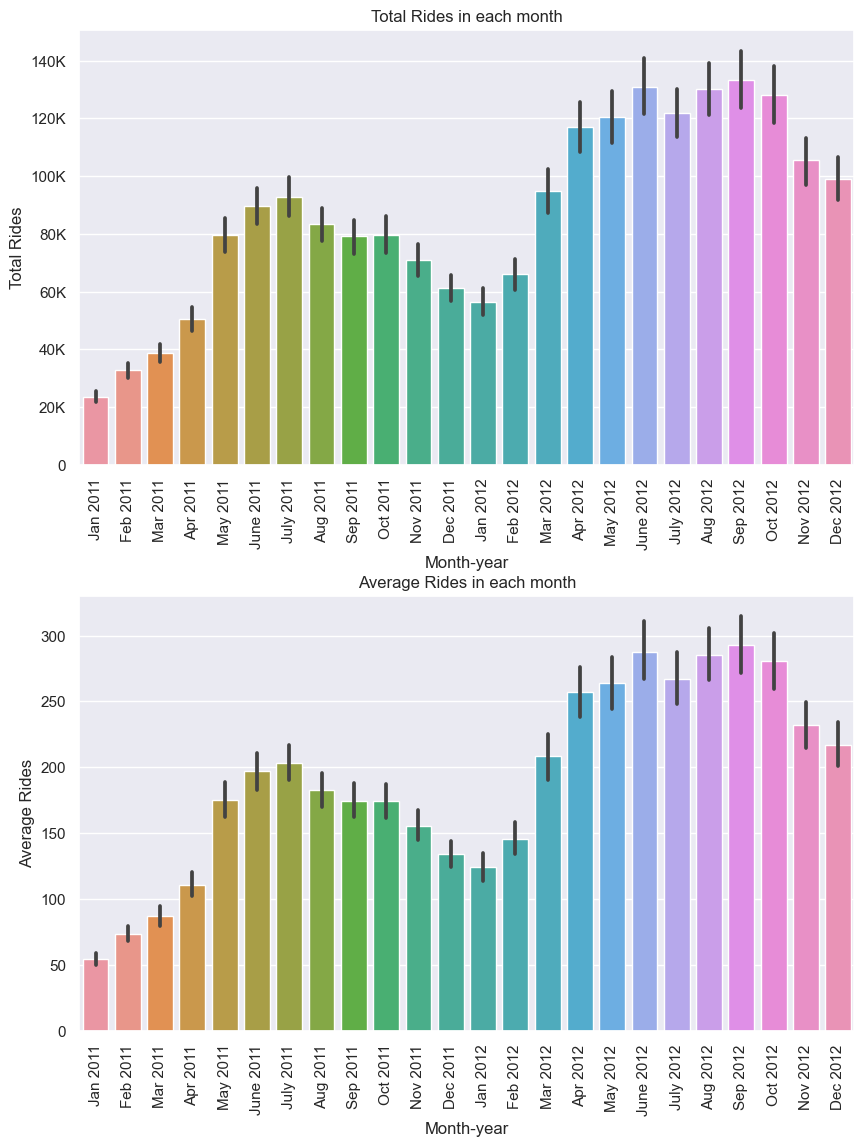

In [15]:
# Barplot to visualize the total numbe rof rides taken each month
sns.set_theme()

plt.figure(figsize=(10,13))
plt.subplot(2,1,1)
plt.title('Total Rides in each month')
sns.barplot(x="mth-yr",y="count",data=df_temp,estimator=np.sum)
plt.xlabel('Month-year')
plt.ylabel('Total Rides')
plt.xticks(rotation=90)
plt.yticks([0,20000,40000,60000,80000,100000,120000,140000],['0','20K','40K','60K','80K','100K','120K','140K'])
plt.subplot(2,1,2)
plt.title('Average Rides in each month')
sns.barplot(x="mth-yr",y="count",data=df_temp,estimator=np.mean)
plt.xlabel('Month-year')
plt.ylabel('Average Rides')
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.3)
plt.show()

- We have data for 2 years i.e. 2011 and 2012
- Maximum number of rides are taken during the mid year (June to August)
- We are also seeing that the demand has increased in 2012 as compared to 2011

# Bivariate Analysis

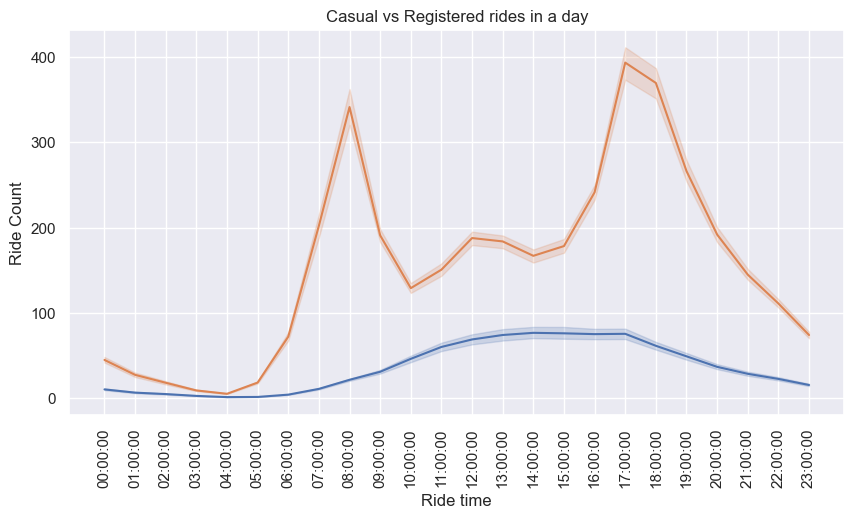

In [16]:
# Create a lineplot to compare the casual vs registered rides during each hour of the day

plt.figure(figsize=(10,5))
plt.title('Casual vs Registered rides in a day')
sns.lineplot(x="time",y="casual",data=df)
sns.lineplot(x="time",y="registered",data=df)
plt.xticks(rotation=90)
plt.xlabel('Ride time')
plt.ylabel('Ride Count')
plt.show()

In [84]:
df['registered'].sum()/df['count'].sum()

0.811968586548107

- We see minimum number of rides from 2 to 5 am
- There is a spike in casual users from 11 am to 5 pm
- There is a high demand from registered users from 6 am to 9 am and then from 4 pm to 8 pm. This indicates that most of the consumers who are registered, use it for going to work
- Ride count for registered users is very high than casual rides all around the day. Around 81% of the total rides are taken by registered uses.

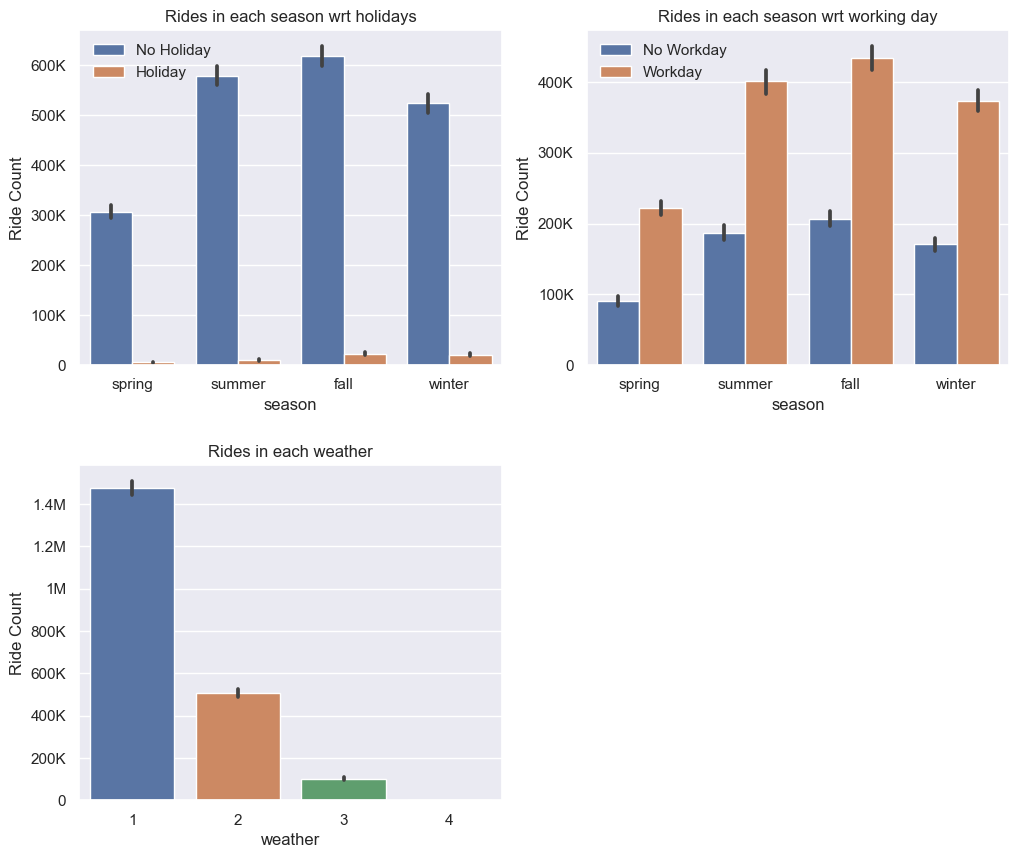

In [17]:
# Generate barplots to compare the ride counts for each season and weather. We can also compare this for working days
# holidays.

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Rides in each season wrt holidays')
sns.barplot(x="season",y="count",hue="holiday",data=df,estimator=np.sum)
plt.legend(loc='upper left',frameon=False)
plt.ylabel('Ride Count')
plt.yticks([0,100000,200000,300000,400000,500000,600000],['0','100K','200K','300K','400K','500K','600K'])

plt.subplot(2,2,2)
plt.title('Rides in each season wrt working day')
sns.barplot(x="season",y="count",hue="workingday",data=df,estimator=np.sum)
plt.yticks([0,100000,200000,300000,400000],['0','100K','200K','300K','400K'])
plt.legend(loc='upper left',frameon=False)
plt.ylabel('Ride Count')

plt.subplot(2,2,3)
plt.title('Rides in each weather')
sns.barplot(x="weather",y="count",data=df,estimator=np.sum)
plt.yticks([0,200000,400000,600000,800000,1000000,1200000,1400000],['0','200K','400K','600K','800K','1M','1.2M','1.4M'])
plt.ylabel('Ride Count')

plt.subplots_adjust(hspace=0.3)
plt.show()

In [105]:
# % of users taking rides when there is no holiday

df[df['holiday']=='No Holiday']['count'].sum()/df['count'].sum()*100

97.22806687777754

In [106]:
# % of users taking rides on workday

df[df['workingday']=='Workday']['count'].sum()/df['count'].sum()*100

68.59843987655576

In [115]:
# % of registered users taking ride on working days

df[df['workingday']=='Workday']['registered'].sum()/df[df['workingday']=='Workday']['count'].sum()*100

86.99164828282319

In [116]:
# % of users taking rides in weather 1 and 2

df[(df['weather']==1) | (df['weather']==2)]['count'].sum()/df['count'].sum()*100

95.09689874158227

- As observed by the first plot, maximum demand is in the fall season followed by summer. Spring has minimal demand.
We see negligible demand on holidays. 97% rides are taken where there are no holidays. 
- As observed in the second plot, customers take more rides on workdays (69%). Though, we see a good number of users
on cycling on weekends as well. We see that 87% of the rides on working days are taken by registered users
- In the last plot, we can clearly infer that weather 1 ( Clear, Few clouds, partly cloudy, partly cloudy) is perfect for cycling.
Customers use the cycle very less during 3 and 4 (snow, rain, thunderstorm) which is expected. 95% of the rides are taken wheather is 1 or 2 (few clouds, partly clouds, mist)

In [18]:
# Create categories for temperature, feeling temperature, humidity and windspeed category

temp_bin=[0,10,20,35,50]
temp_label=['0-10','10-20','20-35','35-50']
df['temp_catg']=pd.cut(df['temp'],bins=temp_bin,labels=temp_label)
df['feel_temp_catg']=pd.cut(df['atemp'],bins=temp_bin,labels=temp_label)

humid_bin=[0,25,50,75,100]
humid_label=['very low','low','medium','high']
df['humid_catg']=pd.cut(df['humidity'],bins=humid_bin,labels=humid_label)
df['humid_catg']=df['humid_catg'].fillna('very low')

df['windspeed_catg']=pd.cut(df['windspeed'],bins=temp_bin,labels=temp_label)
df['windspeed_catg']=df['windspeed_catg'].fillna('0-10')

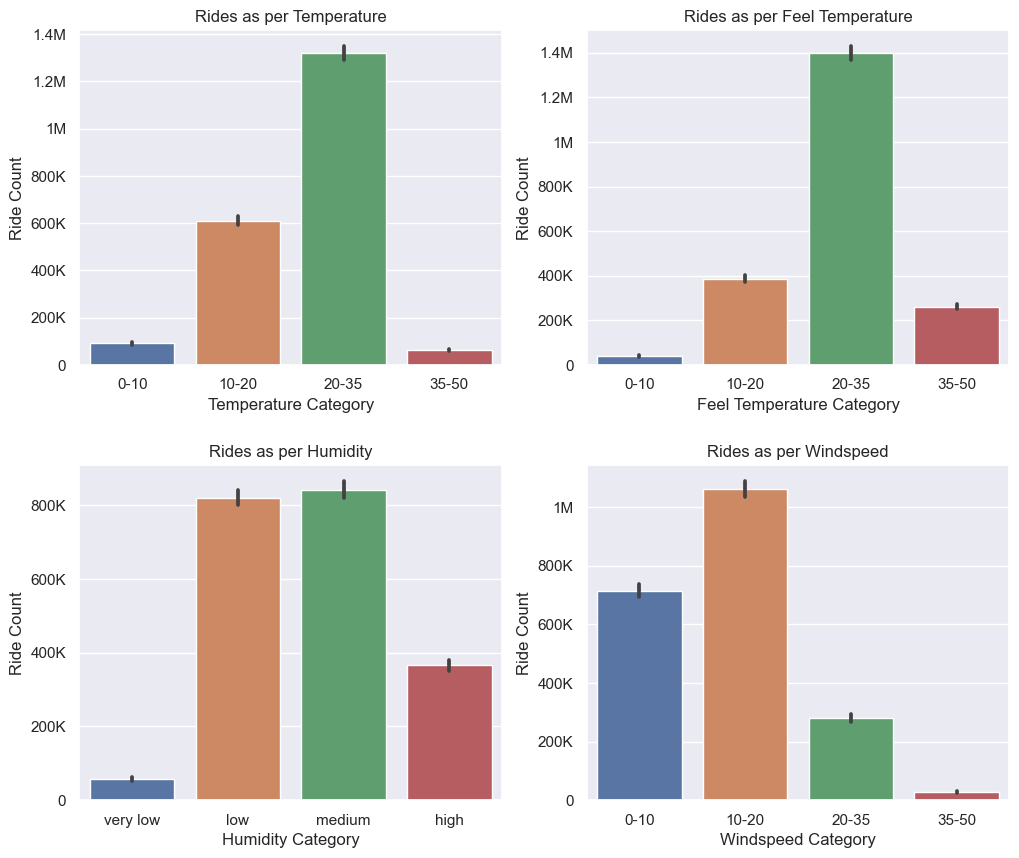

In [19]:
# Generate barplots to compare the ride counts for temperature, feeling temperature, humidity and windspeed

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.title('Rides as per Temperature')
sns.barplot(x='temp_catg',y="count",data=df,estimator=np.sum)
plt.xlabel('Temperature Category')
plt.ylabel('Ride Count')
plt.yticks([0,200000,400000,600000,800000,1000000,1200000,1400000],['0','200K','400K','600K','800K','1M','1.2M','1.4M'])

plt.subplot(2,2,2)
plt.title('Rides as per Feel Temperature')
sns.barplot(x='feel_temp_catg',y="count",data=df,estimator=np.sum)
plt.xlabel('Feel Temperature Category')
plt.ylabel('Ride Count')
plt.yticks([0,200000,400000,600000,800000,1000000,1200000,1400000],['0','200K','400K','600K','800K','1M','1.2M','1.4M'])

plt.subplot(2,2,3)
plt.title('Rides as per Humidity')
sns.barplot(x='humid_catg',y="count",data=df,estimator=np.sum)
plt.xlabel('Humidity Category')
plt.ylabel('Ride Count')
plt.yticks([0,200000,400000,600000,800000],['0','200K','400K','600K','800K'])

plt.subplot(2,2,4)
plt.title('Rides as per Windspeed')
sns.barplot(x='windspeed_catg',y="count",data=df,estimator=np.sum)
plt.xlabel('Windspeed Category')
plt.ylabel('Ride Count')
plt.yticks([0,200000,400000,600000,800000,1000000],['0','200K','400K','600K','800K','1M'])

plt.subplots_adjust(hspace=0.3)
plt.show()

- Temperature range 20-35 is preferred for renting the bicycle. Very few customers use the bicycle when its hot(>35)
or its cold (<10)
- The above observation holds true for feeling temperature as well. We also observe that the ride count when feeling temperature is above 35 is higher as compared to normal temperature
- We have a high ride count when the humidity is low or medium (25 to 75)
- Consumers take the ride when windspeed is less than 20. Very few customers ride a bicycle when windspeed is greater than 35

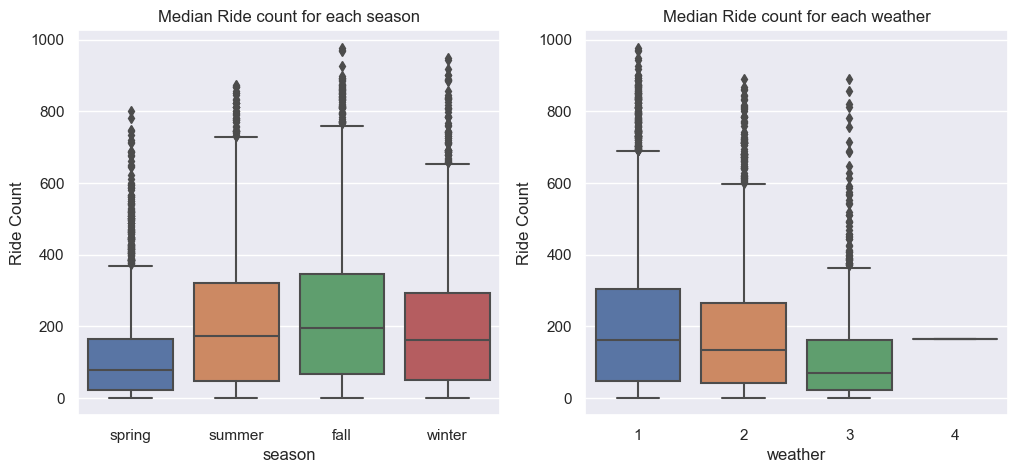

In [20]:
# Generate boxplots to compare the median number of rides for each season and weather

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Median Ride count for each season')
sns.boxplot(y='count',x="season",data=df)
plt.ylabel('Ride Count')

plt.subplot(1,2,2)
plt.title('Median Ride count for each weather')
sns.boxplot(y='count',x="weather",data=df)
plt.ylabel('Ride Count')

plt.show()

C:\Users\samaksharma\AppData\Local\Temp\ipykernel_35884\3765016491.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="coolwarm",annot=True)


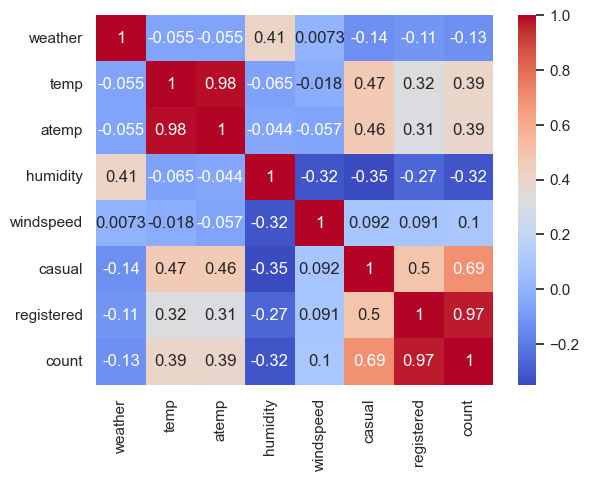

In [21]:
# Generate heatmap to compare the correlation between different numerical fields

sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
plt.show()

- We could see that as the temperature and feeling temperature, the count of rides also increase with correlation of 0.39
- Majority of the rides are contributed by registered users

In [69]:
# Calculate bins for count field so that we can calculate the probability of column dependency

count_bin=[0,100,300,600,800,1000]
count_label=['Very Low','Low','Medium','High','Very High']
df['count_catg']=pd.cut(df['count'],bins=count_bin,labels=count_label)

In [71]:
# Check dependency of season on count

chi2_contingency(pd.crosstab(index=df['season'],columns=df['count_catg']))[1]

3.778368552854824e-157

As the p value is ver low, we can say that season has a dependency on the count of rides

In [72]:
# Check dependency of holiday on count

chi2_contingency(pd.crosstab(index=df['holiday'],columns=df['count_catg']))[1]

0.0008335440237105634

As the p value is very low (0.0008), we can say that if a day is a holiday or not will have dependency on the count of rides

In [73]:
# Check dependency of working day on count

chi2_contingency(pd.crosstab(index=df['workingday'],columns=df['count_catg']))[1]

4.906568459280284e-30

As the p value is very low, we can say that if a day is a working day or not will have dependency on the count of rides

In [74]:
# Check dependency of weather on count

chi2_contingency(pd.crosstab(index=df['weather'],columns=df['count_catg']))[1]

7.434429186879399e-41

As the p value is very low, we can say that weather will have dependency on the count of rides

In [76]:
# Check dependency of temperature category on count

chi2_contingency(pd.crosstab(index=df['feel_temp_catg'],columns=df['count_catg']))[1]

1.0118495600633e-310

As the p value is very low, we can say that temperature will have dependency on the count of rides

In [77]:
# Check dependency of humidity category on count

chi2_contingency(pd.crosstab(index=df['humid_catg'],columns=df['count_catg']))[1]

2.453257641431007e-220

As the p value is very low, we can say that humidity will have dependency on the count of rides

In [78]:
# Check dependency of windspeed category on count

chi2_contingency(pd.crosstab(index=df['windspeed_catg'],columns=df['count_catg']))[1]

5.5024059844360995e-39

As the p value is very low, we can say that windspeed will have dependency on the count of rides

In [81]:
# Check dependency of weather on season

chi2_contingency(pd.crosstab(index=df['weather'],columns=df['season']))[1]

1.5499250736864862e-07

As the p value is very low, we can say that there is a dependency of weather on season

# Illustrate the insights based on EDA

- We have 2 years of data from January 2011 to December 2012. There is an increase of rides taken in 2012 from previous year. We see a steady increase in rides for the months of June to September
- Data is collected for 24 hours of the day. There is a steep increase in number of rides taken from 6 am to 10 am and then from 4 pm to 8 pm. 81% of the total rides are taken by registered users. This indicates that Yulu cycles are primarily used by regular users who use it for going to workplace and then travelling back to home
- There are 4 seasons in a year (spring, summer, fall and winter). Most of the rides are taken in fall, summer and winter. There is a steep decline in this number in spring season.
- 97% of the rides are taken when there is no holiday indicating a direct relation with ride counts
- 69% rides are taken on workdays. This also indicates that good number of users are using on weekends. 87% of the rides on working days are taken by registered users which indicates that this is being used for work travel
- 95% rides are taken when weather is 1 or 2 which indicates clear weather or partly cloud.
- Temperature and feeling temperature varies in the range of 0 to 45. This has a direct impact on the ride count as majority of the rides are taken when temperature is in between 20-35. We see very few rides when temperature is 0 to 10
- Humidity varies between 0 to 100 and 80% of the rides are taken when humidity lies between 25-75. Customers are reluctant to use the bicycle when humidity is very low (0-25)
- Customers tend to use the bicycle when windspeed is between 0 to 20. Very few customers prefer to ride when windspeed is greater than 35
- The median ride count is low in spring and winter, but wev see lot of outliers during that season. Similarly, for weather the median ride count is low when it is light snow or rain, but there are many outliers

# 2. Hypothesis Testing

# 2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented

In [153]:
# Null Hypothesis H0: Mean count for rides on workday and non workday is same
# Alternative Hypothesis Ha: Mean count for rides on workday and non workday is different

workday_count=df[df['workingday']=='Workday']['count']
no_workday_count=df[df['workingday']=='No Workday']['count']


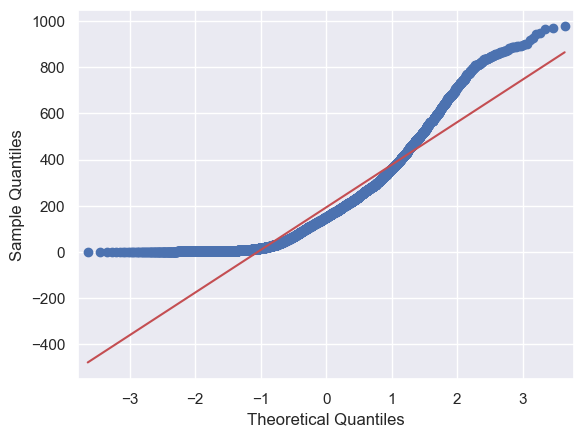

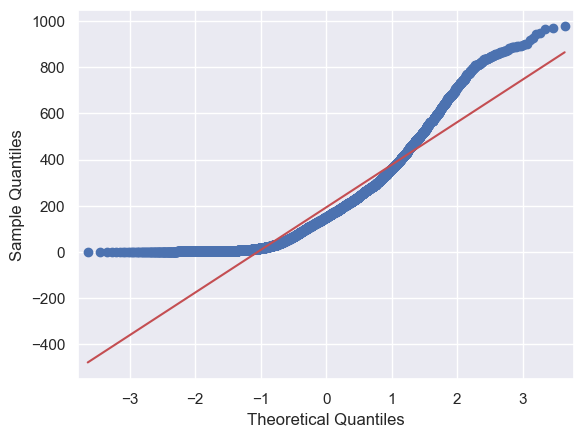

In [164]:
#Generate qqplot to check if the data is gaussian

qqplot(workday_count,line='s')

From the above plot, we can say that the data is not gaussian, so we will apply Shapiro test

In [167]:
#Using shapiro test to check if data is gaussian or not

shapiro(workday_count.sample(100))

ShapiroResult(statistic=0.846479594707489, pvalue=8.809220020111752e-09)

Shapiro test also confirms that data is not gaussian

In [182]:
alpha = 0.05

s,pvalue=ttest_ind(workday_count,no_workday_count)
print('p-value:',round(pvalue,3))
if (pvalue < alpha):
    print('p-value is lower than significance value, hence null hypthesis is rejected and mean ride count is different')
else:
    print('p-value is higher than significance value, hence failed to reject null hypthesis and mean ride count is same')

p-value: 0.226
p-value is higher than significance value, hence failed to reject null hypthesis and mean ride count is same


Though, the total ride count taken on working day is very high as compared to non working day, but, the average ride count is same as seen above in ttest hypothesis test\.
We will use chi2 contingency test to determine if there is an effect of working day on the number of cycles rented

In [147]:
# Null Hypothesis H0: There is no effect of working day on number of cycles rented
# Alternative Hypothesis Ha: Working day has an effect on number of cycles rented

pvalue=chi2_contingency(pd.crosstab(index=df['workingday'],columns=df['count_catg']))[1]
print('p-value:',pvalue)
if (pvalue < alpha):
    print('p-value is lower than significance value, hence null hypthesis is rejected and working day has effect on cycles rented')
else:
    print('p-value is higher than significance value, hence failed to reject null hypthesis and working day has no effect on cycles rented')

p-value: 4.906568459280284e-30
p-value is lower than significance value, hence null hypthesis is rejected and working day has effect on cycles rented


# ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

In [190]:
# Null Hypothesis H0: Average count of cycles rented is similar in all kinds of weather
# Alternative Hypothesis Ha: Average count of cycles rented is different in each weather

alpha = 0.05

w1_ride_count=df[df['weather']==1]['count']
w2_ride_count=df[df['weather']==2]['count']
w3_ride_count=df[df['weather']==3]['count']
w4_ride_count=df[df['weather']==4]['count']

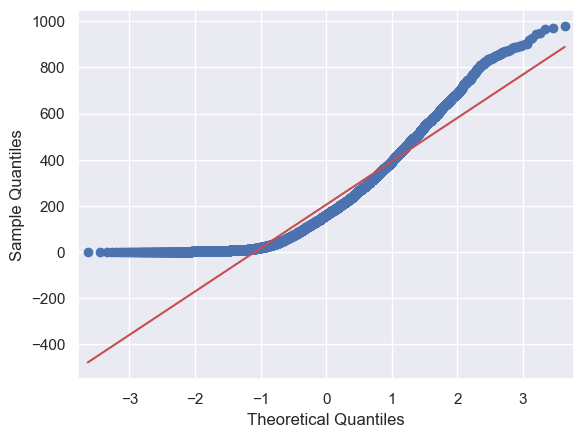

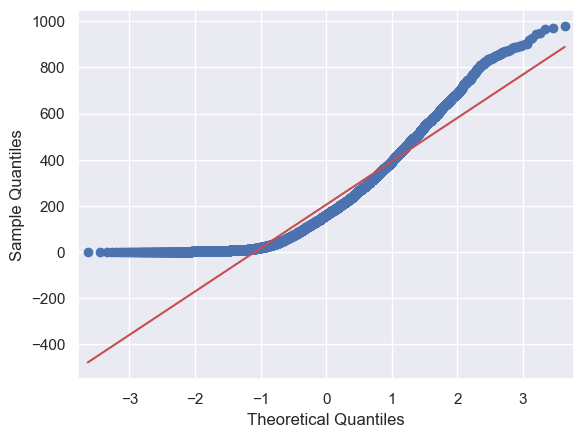

In [195]:
#Generate qqplot to check if the data is gaussian

qqplot(w1_ride_count,line='s')

From the above plot, we can say that the data is not gaussian, so we will apply Shapiro test

In [196]:
#Using shapiro test to check if data is gaussian or not

shapiro(w1_ride_count.sample(100))

ShapiroResult(statistic=0.8838911652565002, pvalue=2.661464861830609e-07)

Since p-value is very low, Shapiro test also confirms that data is not gaussian

In [199]:
s,pvalue=levene(w1_ride_count,w2_ride_count,w3_ride_count,w4_ride_count)
print('p-value:',pvalue)
if (pvalue < alpha):
    print('p-value is lower than significance value, hence null hypthesis is rejected and average number of cycles rented is different in each weather')
else:
    print('p-value is higher than significance value, hence failed to reject null hypthesis and average ride count is same for each weather')

p-value: 3.504937946833238e-35
p-value is lower than significance value, hence null hypthesis is rejected and average number of cycles rented is different in each weather


p value is very low and this clearly indicates that number of cycles rented is different in each weather. We have used chi2_contingency test above and infered that there is a clear relation between weather and number of cycles rented.

In [200]:
# Null Hypothesis H0: Average count of cycles rented is similar in all seasons
# Alternative Hypothesis Ha: Average count of cycles rented is different in each season

alpha = 0.05

s1_ride_count=df[df['season']=='spring']['count']
s2_ride_count=df[df['season']=='summer']['count']
s3_ride_count=df[df['season']=='fall']['count']
s4_ride_count=df[df['season']=='winter']['count']

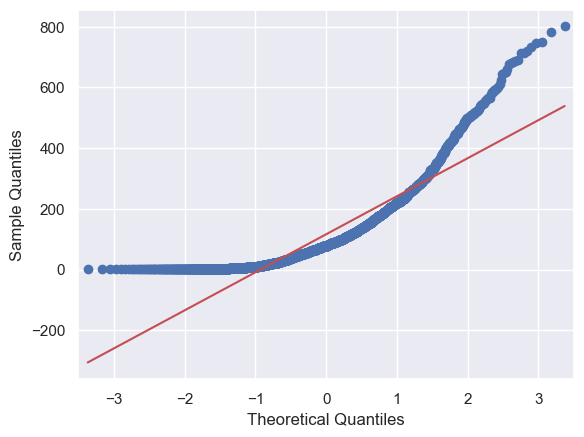

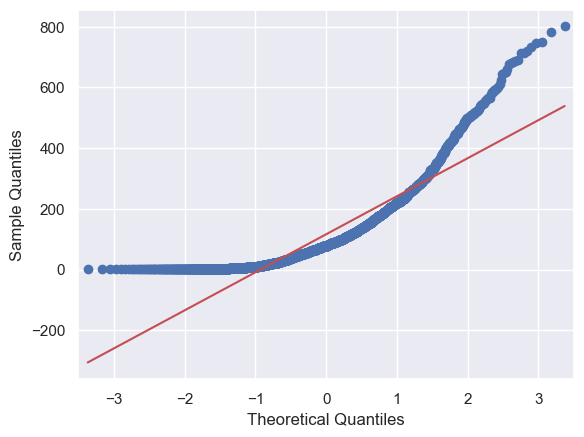

In [201]:
#Generate qqplot to check if the data is gaussian

qqplot(s1_ride_count,line='s')

From the above plot, we can say that the data is not gaussian, so we will apply Shapiro test

In [202]:
#Using shapiro test to check if data is gaussian or not

shapiro(s1_ride_count.sample(100))

ShapiroResult(statistic=0.8544162511825562, pvalue=1.732626664363579e-08)

Since p-value is very low, Shapiro test also confirms that data is not gaussian

In [203]:
s,pvalue=kruskal(s1_ride_count,s2_ride_count,s3_ride_count,s4_ride_count)
print('p-value:',pvalue)
if (pvalue < alpha):
    print('p-value is lower than significance value, hence null hypthesis is rejected and average number of cycles rented is different in each season')
else:
    print('p-value is higher than significance value, hence failed to reject null hypthesis and average ride count is same for each season')

p-value: 2.479008372608633e-151
p-value is lower than significance value, hence null hypthesis is rejected and average number of cycles rented is different in each season


p value is clearly very low and this clearly indicates that number of cycles rented is different in each season. We have used chi2_contingency test above and infered that there is a clear relation between season and number of cycles rented.

# Chi-square test to check if Weather is dependent on the season

In [206]:
# We will use chi2_contingency to check if weather has a dependency on season

# Null Hypothesis H0: Weather has no dependency on season
# Alternative Hypothesis Ha: Weather has dependency on season

chi2_contingency(pd.crosstab(index=df['weather'],columns=df['season']))[1]

1.5499250736864862e-07

p-value is very low and thereby we can reject null hypothesis. Thereby, we can conclude that weather has dependency on season.

# Business Recommendations

- We see clear dependency of weather and season on number of bicycles rented. Yulu, should consider these factors and allocate the bicycles as per that. E.g. They should increase the number of bicycles available during summer and fall as there is very high demand during that season
- Since, the demand is very low during late night and early morning hours. This time period can be used for charging the electric bicycles. Office hours are very busy and they should setup more bicycles during that time period to fulfilll the demand
- Holidays have a direct correlation with ride count. Since, the demand is less during holidays, this time can be used for bicycle maintenance
- Weather factors like temperature, humidity, windspeed also have a relation on number of cycles rented. Therefore, company can look into the climate prediction and regulate the supply as per that
- Casual riders count is very less as compared to registered users. This can be increased by providing with discounts and offers like discount on first 5 rides
- Registered users are the ones contributing to 80% of the rides. Therefore, customer friendly subscription packs should be provided to ensure retention